In [20]:
import os
import pandas as pd
import numpy as np
#import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.regularizers import l2
from keras.optimizers import Adam
import tensorflow as tf
from keras import layers
import keras
import utils

In [21]:
DATA_PATH = "/Users/mykola/MLHEP/Wiremind/"
raw_features = pd.read_csv(os.path.join(DATA_PATH, "ds_train.csv"))

In [22]:
all_features = utils.features_preparation(raw_features)
all_features

,current_price,days_before_departure,departure_date,direction,train_number,demand,od_destination_time_year,od_destination_time_month,od_destination_time_week,od_destination_time_day,...,od_destination_time_minute,od_origin_time_hour,od_origin_time_minute,od_time_travel,of_holiday,unof_holiday,od_destination_time_hourmin,od_origin_time_hourmin,direction_bool,date_numerical
0,100,0,2018-01-02,outbound,941,1.0,2018,1,1,2,...,41,5,17,144.0,0,0,461,317,1,2
1,100,1,2018-01-02,outbound,941,1.0,2018,1,1,2,...,41,5,17,144.0,0,0,461,317,1,2
2,100,2,2018-01-02,outbound,941,0.0,2018,1,1,2,...,41,5,17,144.0,0,0,461,317,1,2
3,100,3,2018-01-02,outbound,941,1.0,2018,1,1,2,...,41,5,17,144.0,0,0,461,317,1,2
4,100,4,2018-01-02,outbound,941,0.0,2018,1,1,2,...,41,5,17,144.0,0,0,461,317,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292645,44,25,2018-12-28,inbound,980,0.0,2018,12,52,28,...,53,21,50,123.0,0,0,1433,1310,0,362
292646,44,26,2018-12-28,inbound,980,0.0,2018,12,52,28,...,53,21,50,123.0,0,0,1433,1310,0,362
292647,44,27,2018-12-28,inbound,980,0.0,2018,12,52,28,...,53,21,50,123.0,0,0,1433,1310,0,362
292648,44,28,2018-12-28,inbound,980,0.0,2018,12,52,28,...,53,21,50,123.0,0,0,1433,1310,0,362


In [11]:
scaled_features = utils.features_scale(all_features)
scaled_features

/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,current_price,days_before_departure,od_destination_time_month,od_destination_time_week,od_destination_time_day,od_destination_time_weekday,od_time_travel,od_destination_time_hourmin,od_origin_time_hourmin,direction_bool,demand,of_holiday,unof_holiday,date_numerical
0,0.788732,0.000000,0.0,0.0,0.033333,0.166667,0.901961,0.231013,0.224219,1,1.0,0,0,2
1,0.788732,0.034483,0.0,0.0,0.033333,0.166667,0.901961,0.231013,0.224219,1,1.0,0,0,2
2,0.788732,0.068966,0.0,0.0,0.033333,0.166667,0.901961,0.231013,0.224219,1,0.0,0,0,2
3,0.788732,0.103448,0.0,0.0,0.033333,0.166667,0.901961,0.231013,0.224219,1,1.0,0,0,2
4,0.788732,0.137931,0.0,0.0,0.033333,0.166667,0.901961,0.231013,0.224219,1,0.0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292645,0.000000,0.862069,1.0,1.0,0.900000,0.666667,0.490196,1.000000,1.000000,0,0.0,0,0,362
292646,0.000000,0.896552,1.0,1.0,0.900000,0.666667,0.490196,1.000000,1.000000,0,0.0,0,0,362
292647,0.000000,0.931034,1.0,1.0,0.900000,0.666667,0.490196,1.000000,1.000000,0,0.0,0,0,362
292648,0.000000,0.965517,1.0,1.0,0.900000,0.666667,0.490196,1.000000,1.000000,0,0.0,0,0,362


In [23]:
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model
import tensorlayer as tl
main_input = Input(shape=(12,))
dense20 = Dense(512,activation='tanh')(main_input)
dpt3 = (layers.Dropout(rate=0.15))(dense20)
dense21 = Dense(256,activation='tanh')(dpt3)
bn1 = layers.BatchNormalization()(dense21)
dense22 = Dense(128,activation='tanh')(bn1)
bn2 = layers.BatchNormalization()(dense22)
dense23 = Dense(64,activation='tanh')(bn2)
bn3 = layers.BatchNormalization()(dense23)
secondary_out = Dense(1,activation=K.exp)(bn3)
secondary_out.trainable = False



NameError: name 'K' is not defined

In [25]:

import tensorflow as tf

def negative_binomial_layer(x):
    """
    Lambda function for generating negative binomial parameters
    n and p from a Dense(2) output.
    Assumes tensorflow 2 backend.
    
    Usage
    -----
    outputs = Dense(2)(final_layer)
    distribution_outputs = Lambda(negative_binomial_layer)(outputs)
    
    Parameters
    ----------
    x : tf.Tensor
        output tensor of Dense layer
        
    Returns
    -------
    out_tensor : tf.Tensor
        
    """
    
    # Get the number of dimensions of the input
    num_dims = len(x.get_shape())
    
    # Separate the parameters
    n, p = tf.unstack(x, num=2, axis=-1)
    
    # Add one dimension to make the right shape
    n = tf.expand_dims(n, -1)
    p = tf.expand_dims(p, -1)
        
    # Apply a softplus to make positive
    n = tf.keras.activations.softplus(n)
    
    # Apply a sigmoid activation to bound between 0 and 1
    p = tf.keras.activations.sigmoid(p)

    # Join back together again
    out_tensor = tf.concat((n, p), axis=num_dims-1)

    return out_tensor


In [48]:
# We need a class (or closure) here,
# because it's not possible to
# pass extra arguments to Keras loss functions
# See https://github.com/fchollet/keras/issues/2121

# dispersion (theta) parameter is a scalar by default.
# scale_factor scales the nbinom mean before the 
# calculation of the loss to balance the
# learning rates of theta and network weights

class NB(object):
    def __init__(self, theta=None, theta_init=[0.0],
                 scale_factor=1.0, scope='nbinom_loss/',
                 debug=False, **theta_kwargs):
        
        # for numerical stability
        self.eps = 1e-10
        self.scale_factor = scale_factor
        self.debug = debug
        self.scope = scope
        
        with tf.name_scope(self.scope):
            # a variable may be given by user or it can be created here
            if theta is None:
                theta = tf.Variable(theta_init, dtype=tf.float32,
                                    name='theta', **theta_kwargs)

            # keep a reference to the variable itself
            self.theta_variable = theta

            # to keep dispersion always non-negative
            self.theta = tf.nn.softplus(theta)
           
    def loss(self, y_true, y_pred, reduce=True):
        scale_factor = self.scale_factor
        eps = self.eps
        
        with tf.name_scope(self.scope):
            y_true = tf.cast(y_true, tf.float32)
            y_pred = tf.cast(y_pred, tf.float32) * scale_factor
            
            theta = 1.0/(self.theta+eps)

            t1 = -tf.math.lgamma(y_true+theta+eps) 
            t2 = tf.math.lgamma(theta+eps)
            t3 = tf.math.lgamma(y_true+1.0) 
            t4 = -(theta * (tf.math.log(theta+eps)))
            t5 = -(y_true * (tf.math.log(y_pred+eps)))
            t6 = (theta+y_true) * tf.math.log(theta+y_pred+eps)      

            if self.debug:
                tf.summary.histogram('t1', t1)
                tf.summary.histogram('t2', t2)
                tf.summary.histogram('t3', t3)
                tf.summary.histogram('t4', t4)
                tf.summary.histogram('t5', t5)
                tf.summary.histogram('t6', t6)

            final = t1 + t2 + t3 + t4 + t5 + t6
            
            if reduce:
                final = tf.reduce_mean(final)
            
        return final

In [26]:
import tensorflow as tf

def negative_binomial_loss(y_true, y_pred):
    """
    Negative binomial loss function.
    Assumes tensorflow backend.
    
    Parameters
    ----------
    y_true : tf.Tensor
        Ground truth values of predicted variable.
    y_pred : tf.Tensor
        n and p values of predicted distribution.
        
    Returns
    -------
    nll : tf.Tensor
        Negative log likelihood.
    """

    # Separate the parameters
    n, p = tf.unstack(y_pred, num=2, axis=-1)
    
    # Add one dimension to make the right shape
    n = tf.expand_dims(n, -1)
    p = tf.expand_dims(p, -1)
    
    # Calculate the negative log likelihood
    nll = (
        tf.math.lgamma(n) 
        + tf.math.lgamma(y_true + 1)
        - tf.math.lgamma(n + y_true)
        - n * tf.math.log(p)
        - y_true * tf.math.log(1 - p)
    )                  

    return nll

In [66]:
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model
import tensorlayer as tl
main_input = Input(shape=(12,))
dense23 = Dense(512,activation='relu')(main_input)
#bn3 = layers.BatchNormalization()(dense23)
dense22 = Dense(256,activation='relu')(dense23)
#bn2 = layers.BatchNormalization()(dense22)
dense21 = Dense(256,activation='relu')(dense22)
#bn1 = layers.BatchNormalization()(dense22)
secondary_out = Dense(2)(bn1)

#distribution_outputs = Lambda(negative_binomial_layer)(secondary_out)
secondary_out.trainable = False

model = Model(inputs=main_input, outputs=distribution_outputs)



In [69]:
print(model.layers[-1])

In [34]:
train_part, validation = train_test_split(scaled_features, test_size=0.2, shuffle=True, random_state=342343234)
print(train_part.shape)
print(validation.shape)
validation.demand

(234120, 14)
(58530, 14)


69580     0.0
49753     0.0
2702      1.0
98526     0.0
109822    2.0
         ... 
128419    0.0
270933    0.0
292252    0.0
247226    0.0
205700    0.0
Name: demand, Length: 58530, dtype: float64

In [67]:
from tensorflow.keras.optimizers import Adam

nb = NB()
nbinom_loss, param_theta = nb.loss, nb.theta

opt = Adam()
#model.compile(loss = negative_binomial_loss, metrics = ["MAE","MSE"], optimizer = opt)
#model.compile(loss = negative_binomial_loss, metrics = ["MAE","MSE"], optimizer = opt)
model.compile(loss = negative_binomial_loss, metrics = ["MAE","MSE"], optimizer = opt)

#history = model.fit(train_X, train_Y, epochs = num_epochs,validation_data = [val_X, val_Y])
save_all_xy = keras.callbacks.ModelCheckpoint("NNmodels/"+'weights.{epoch:02d}-{val_loss:.5f}.h5', monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

history = model.fit(train_part.loc[:,utils.input_features].values,train_part.demand, verbose=1, callbacks=[save_all_xy], validation_data=(validation.loc[:,utils.input_features].values, validation.demand), shuffle=True, batch_size=150, epochs=1100)


Epoch 1/1100
1551/1561 [============================>.] - ETA: 0s - loss: 1.1259 - MAE: 1.4311 - MSE: 13.4151
Epoch 00001: saving model to NNmodels/weights.01-1.09437.h5
1561/1561 [==============================] - 6s 4ms/step - loss: 1.1258 - MAE: 1.4304 - MSE: 13.4004 - val_loss: 1.0944 - val_MAE: 1.3816 - val_MSE: 12.5525
Epoch 2/1100
1555/1561 [============================>.] - ETA: 0s - loss: 1.0898 - MAE: 1.3786 - MSE: 12.7405
Epoch 00002: saving model to NNmodels/weights.02-1.07993.h5
1561/1561 [==============================] - 6s 4ms/step - loss: 1.0898 - MAE: 1.3784 - MSE: 12.7326 - val_loss: 1.0799 - val_MAE: 1.3436 - val_MSE: 11.9694
Epoch 3/1100
 814/1561 [==============>...............] - ETA: 2s - loss: 1.0814 - MAE: 1.3632 - MSE: 12.3231

KeyboardInterrupt: 

In [ ]:
model = Model(inputs=[main_input],outputs=[secondary_out])
from keras import backend as K
def poisson(y_true, y_pred): 
    return K.mean(K.maximum(.0, y_pred) - y_true * K.log(K.maximum(.0, y_pred) + K.epsilon()), axis=-1)
#    return K.mean(y_pred - y_true * K.log(y_pred + K.epsilon()), axis=-1)
def poisson_loss(y_true, y_pred):
    y_pred = tf.cast(y_pred, tf.float32)
    y_true = tf.cast(y_true, tf.float32)
    return tf.reduce_mean(y_pred - y_true*tf.math.log(y_pred+1e-10) + \
                          tf.math.lgamma(y_true+1.0))
m = tf.keras.losses.poisson

save_all_xy = keras.callbacks.ModelCheckpoint("NNmodels/"+'weights.{epoch:02d}-{val_loss:.5f}.h5', monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)
model.compile(loss=[poisson_loss], metrics=["MAE","MSE"] ,optimizer=Adam(lr=0.001),loss_weights=[1])
history = model.fit(train_part.loc[:,utils.input_features].values,train_part.demand, verbose=1, callbacks=[save_all_xy], validation_data=(validation.loc[:,utils.input_features].values, validation.demand), shuffle=True, batch_size=150, epochs=1100)


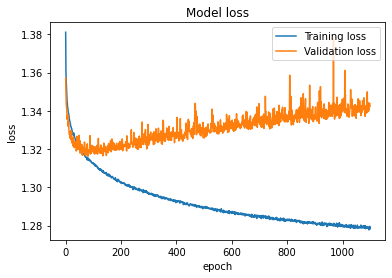

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.savefig("loss.png")
plt.show()

In [ ]:
from keras.models import load_model

def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

def poisson_loss(y_true, y_pred):
    y_pred = tf.cast(y_pred, tf.float32)
    y_true = tf.cast(y_true, tf.float32)
    return tf.reduce_mean(y_pred - y_true*tf.math.log(y_pred+1e-10) + \
                          tf.math.lgamma(y_true+1.0))

model = load_model("/Users/mykola/MLHEP/Wiremind/NNModels/weights.85-1.15921.h5", custom_objects={'<lambda>': lambda x : tl.act.lrelu(x, 0.2),"r_square":r_square,"exp":K.exp,"poisson_loss":poisson_loss})
prediction_validation = np.array(model.predict(validation.loc[:, utils.input_features].values),dtype=float)

In [ ]:
k = np.floor(prediction_validation).astype(np.int)
np.unique(k)
#validation.demand.unique


In [ ]:
first = prediction_validation
first.flatten().shape
second = prediction_validation

In [ ]:
#validation.shape
prediction_validation.shape
#validation.loc[:,"nn_demand"] = np.rint(prediction_validation.flatten())
#validation[25:50]
#prediction_validation

In [ ]:
#1.25*np.rint(prediction_validation)[:50]
print(abs(np.rint(k.flatten()) - np.array(validation.demand)).sum())
#np.rint(prediction_validation)[:50]
#np.mean(validation.current_price*abs(np.rint(first.flatten()) - np.array(validation.demand)))


In [ ]:
np.mean(abs(np.rint(k.flatten()) - np.array(validation.demand)))
#np.mean((np.rint(k.flatten()) - np.array(validation.demand))**2)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x = np.random.randint(1, 100, 5000)
x
#plt.hist(x, bins=20)
#plt.ylabel('No of times')
#plt.show()